In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

<h1>11. 01. 2025.</h1>

<h2>Tracking on Bz vs. simulated velocities at different $\tau$-s</h2>

<h3>$\log\tau=-1$</h3>

In [5]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
#Vxm1 = Vxm1[::3]
#Vym1 = Vym1[::3]
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

In [6]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
Vym1_mean = Vym1_mean/1E5

In [7]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5, mode = "wrap")

In [8]:
Vx_Bz1 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum1Bz_tracked.fits")[0].data
Vy_Bz1 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum1Bz_tracked.fits")[1].data

In [9]:
Vx_Bz1_mean = temporal_avg(Vx_Bz1, 0, 90)
Vy_Bz1_mean = temporal_avg(Vy_Bz1, 0, 90)

In [10]:
Rxm1_reg = pearsonr((Vxm1[0]/1E5).flatten(), Vx_Bz1[0].flatten())
print(Rxm1_reg)

PearsonRResult(statistic=0.6166480290398004, pvalue=0.0)


In [11]:
Rym1_reg = pearsonr((Vym1[0]/1E5).flatten(), Vy_Bz1[0].flatten())
print(Rym1_reg)

PearsonRResult(statistic=0.5934201654525127, pvalue=0.0)


In [12]:
Rxm1_tav = pearsonr(Vxm1_mean.flatten(), Vx_Bz1_mean.flatten())
print(Rxm1_tav)

PearsonRResult(statistic=0.7824599700859564, pvalue=0.0)


In [13]:
Rym1_tav = pearsonr(Vym1_mean.flatten(), Vy_Bz1_mean.flatten())
print(Rym1_tav)

PearsonRResult(statistic=0.7836429680094132, pvalue=0.0)


In [14]:
Rxm1_fil = pearsonr(Vxm1_filtered600.flatten(), Vx_Bz1_mean.flatten())
print(Rxm1_fil)

PearsonRResult(statistic=0.893612292601921, pvalue=0.0)


In [15]:
Rym1_fil = pearsonr(Vym1_filtered600.flatten(), Vy_Bz1_mean.flatten())
print(Rym1_fil)

PearsonRResult(statistic=0.8979314881131106, pvalue=0.0)


/tmp/ipykernel_19149/3902164337.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/3902164337.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM_logtaum1.png", dpi = 100)
/home/mistflow/anaconda3/envs/flct/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


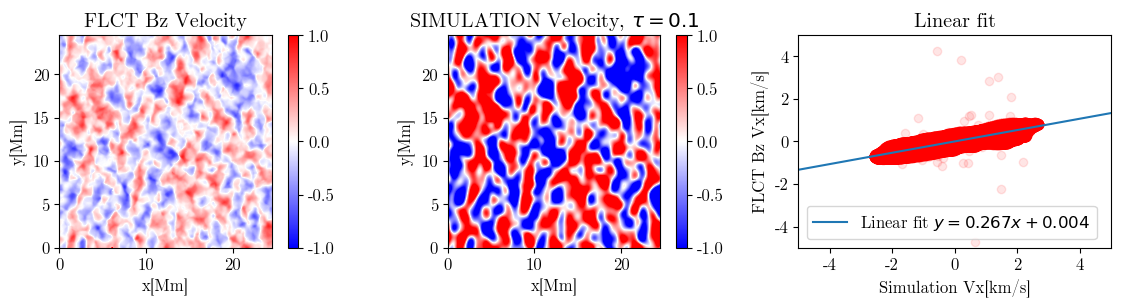

In [16]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz1_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.1$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm1_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm1_filtered600[:,:].flatten(), Vx_Bz1_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Bz Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m, b, *_ = linregress(Vxm1_filtered600.flatten(), Vx_Bz1_mean.flatten())
plt.axline(xy1=(0, b), slope=m, label=f'Linear fit $y = {m:.3f}x {b:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM_logtaum1.png", dpi = 100)

<h3>$\log\tau=-2$</h3>

In [17]:
Vxm2 = fits.open("Velocities_TAU_0_010.fits")[1].data # Vy from Velocities.fits as originally thought
Vym2 = fits.open("Velocities_TAU_0_010.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm2 = Vxm2.transpose(0, 2, 1)
Vym2 = Vym2.transpose(0, 2, 1)

In [18]:
Vxm2_mean = temporal_avg(Vxm2, 0, 90)
Vxm2_mean = Vxm2_mean/1E5
Vym2_mean = temporal_avg(Vym2, 0, 90)
Vym2_mean = Vym2_mean/1E5

In [19]:
Vxm2_filtered600 = gaussian_filter(Vxm2_mean, 22.5, mode = "wrap")
Vym2_filtered600 = gaussian_filter(Vym2_mean, 22.5, mode = "wrap")

In [20]:
Vx_Bz2 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum2Bz_tracked.fits")[0].data
Vy_Bz2 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum2Bz_tracked.fits")[1].data

In [21]:
Vx_Bz2_mean = temporal_avg(Vx_Bz2, 0, 90)
Vy_Bz2_mean = temporal_avg(Vy_Bz2, 0, 90)

In [22]:
Rxm2_reg = pearsonr((Vxm2[0]/1E5).flatten(), Vx_Bz2[0].flatten())
print(Rxm2_reg)

PearsonRResult(statistic=0.5787581814338028, pvalue=0.0)


In [23]:
Rym2_reg = pearsonr((Vym2[0]/1E5).flatten(), Vy_Bz2[0].flatten())
print(Rym2_reg)

PearsonRResult(statistic=0.5801255550168782, pvalue=0.0)


In [24]:
Rxm2_tav = pearsonr(Vxm2_mean.flatten(), Vx_Bz2_mean.flatten())
print(Rxm2_tav)

PearsonRResult(statistic=0.763392700771237, pvalue=0.0)


In [25]:
Rym2_tav = pearsonr(Vym2_mean.flatten(), Vy_Bz2_mean.flatten())
print(Rym2_tav)

PearsonRResult(statistic=0.7589710393883901, pvalue=0.0)


In [26]:
Rxm2_fil = pearsonr(Vxm2_filtered600.flatten(), Vx_Bz2_mean.flatten())
print(Rxm2_fil)

PearsonRResult(statistic=0.8574397977691767, pvalue=0.0)


In [27]:
Rym2_fil = pearsonr(Vym2_filtered600.flatten(), Vy_Bz2_mean.flatten())
print(Rym2_fil)

PearsonRResult(statistic=0.8488358452746069, pvalue=0.0)


/tmp/ipykernel_19149/1200423249.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/1200423249.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM_logtaum2.png", dpi = 100)


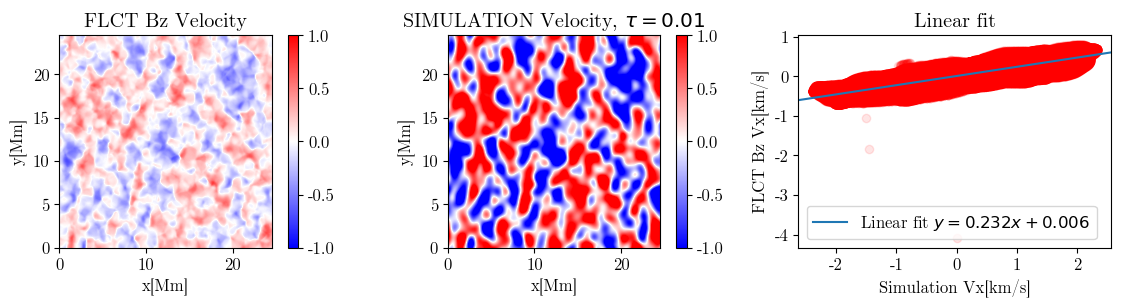

In [28]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz2_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.01$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm2_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Bz2_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Bz Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m2, b2, *_ = linregress(Vxm2_filtered600.flatten(), Vx_Bz2_mean.flatten())
plt.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM_logtaum2.png", dpi = 100)

<h3>$\log\tau=-3$</h3>

In [29]:
Vxm3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm3 = Vxm3.transpose(0, 2, 1)
Vym3 = Vym3.transpose(0, 2, 1)

In [30]:
Vxm3_mean = temporal_avg(Vxm3, 0, 90)
Vxm3_mean = Vxm3_mean/1E5
Vym3_mean = temporal_avg(Vym3, 0, 90)
Vym3_mean = Vym3_mean/1E5

In [31]:
Vxm3_filtered600 = gaussian_filter(Vxm3_mean, 22.5, mode = "wrap")
Vym3_filtered600 = gaussian_filter(Vym3_mean, 22.5, mode = "wrap")

In [32]:
Vx_Bz3 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum3Bz_tracked.fits")[0].data
Vy_Bz3 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum3Bz_tracked.fits")[1].data

In [33]:
Vx_Bz3_mean = temporal_avg(Vx_Bz3, 0, 90)
Vy_Bz3_mean = temporal_avg(Vy_Bz3, 0, 90)

In [34]:
Rxm3_reg = pearsonr((Vxm3[0]/1E5).flatten(), Vx_Bz3[0].flatten())
print(Rxm3_reg)

PearsonRResult(statistic=0.6069007292463952, pvalue=0.0)


In [35]:
Rym3_reg = pearsonr((Vym3[0]/1E5).flatten(), Vy_Bz3[0].flatten())
print(Rym3_reg)

PearsonRResult(statistic=0.5966030332819795, pvalue=0.0)


In [36]:
Rxm3_tav = pearsonr(Vxm3_mean.flatten(), Vx_Bz3_mean.flatten())
print(Rxm3_tav)

PearsonRResult(statistic=0.7849719369928048, pvalue=0.0)


In [37]:
Rym3_tav = pearsonr(Vym3_mean.flatten(), Vy_Bz3_mean.flatten())
print(Rym3_tav)

PearsonRResult(statistic=0.7492468430448557, pvalue=0.0)


In [38]:
Rxm3_fil = pearsonr(Vxm3_filtered600.flatten(), Vx_Bz3_mean.flatten())
print(Rxm3_fil)

PearsonRResult(statistic=0.8481436129898199, pvalue=0.0)


In [39]:
Rym3_fil = pearsonr(Vym3_filtered600.flatten(), Vy_Bz3_mean.flatten())
print(Rym3_fil)

PearsonRResult(statistic=0.8111730698049616, pvalue=0.0)


/tmp/ipykernel_19149/484583251.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/484583251.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM_logtaum3.png", dpi = 100)


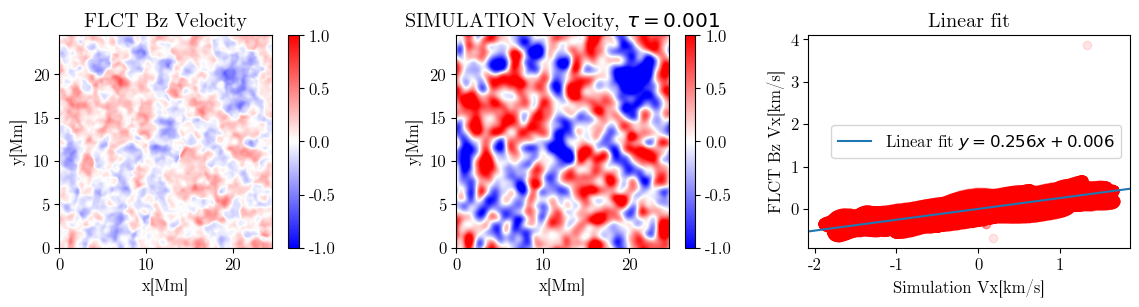

In [40]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz3_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm3_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm3_filtered600[:,:].flatten(), Vx_Bz3_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Bz Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m3, b3, *_ = linregress(Vxm3_filtered600.flatten(), Vx_Bz3_mean.flatten())
plt.axline(xy1=(0, b3), slope=m3, label=f'Linear fit $y = {m3:.3f}x {b3:+.3f}$')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM_logtaum3.png", dpi = 100)

<h3>$\log\tau=-4$</h3>

In [41]:
Vxm4 = fits.open("Velocities_TAU_0_0001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym4 = fits.open("Velocities_TAU_0_0001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm4 = Vxm4.transpose(0, 2, 1)
Vym4 = Vym4.transpose(0, 2, 1)

In [42]:
Vxm4_mean = temporal_avg(Vxm4, 0, 90)
Vxm4_mean = Vxm4_mean/1E5
Vym4_mean = temporal_avg(Vym4, 0, 90)
Vym4_mean = Vym4_mean/1E5

In [43]:
Vxm4_filtered600 = gaussian_filter(Vxm4_mean, 22.5, mode = "wrap")
Vym4_filtered600 = gaussian_filter(Vym4_mean, 22.5, mode = "wrap")

In [44]:
Vx_Bz4 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum4Bz_tracked.fits")[0].data
Vy_Bz4 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum4Bz_tracked.fits")[1].data

In [45]:
Vx_Bz4_mean = temporal_avg(Vx_Bz4, 0, 90)
Vy_Bz4_mean = temporal_avg(Vy_Bz4, 0, 90)

In [46]:
Rxm4_reg = pearsonr((Vxm4[0]/1E5).flatten(), Vx_Bz4[0].flatten())
print(Rxm4_reg)

PearsonRResult(statistic=0.6319982968749469, pvalue=0.0)


In [47]:
Rym4_reg = pearsonr((Vym4[0]/1E5).flatten(), Vy_Bz4[0].flatten())
print(Rym4_reg)

PearsonRResult(statistic=0.6039980066155595, pvalue=0.0)


In [48]:
Rxm4_tav = pearsonr(Vxm4_mean.flatten(), Vx_Bz4_mean.flatten())
print(Rxm4_tav)

PearsonRResult(statistic=0.7898946863688687, pvalue=0.0)


In [49]:
Rym4_tav = pearsonr(Vym4_mean.flatten(), Vy_Bz4_mean.flatten())
print(Rym4_tav)

PearsonRResult(statistic=0.7655444556286147, pvalue=0.0)


In [50]:
Rxm4_fil = pearsonr(Vxm4_filtered600.flatten(), Vx_Bz4_mean.flatten())
print(Rxm4_fil)

PearsonRResult(statistic=0.8588995023179201, pvalue=0.0)


In [51]:
Rym4_fil = pearsonr(Vym4_filtered600.flatten(), Vy_Bz4_mean.flatten())
print(Rym4_fil)

PearsonRResult(statistic=0.8415911672836799, pvalue=0.0)


/tmp/ipykernel_19149/250787225.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/250787225.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM_logtaum4.png", dpi = 100)


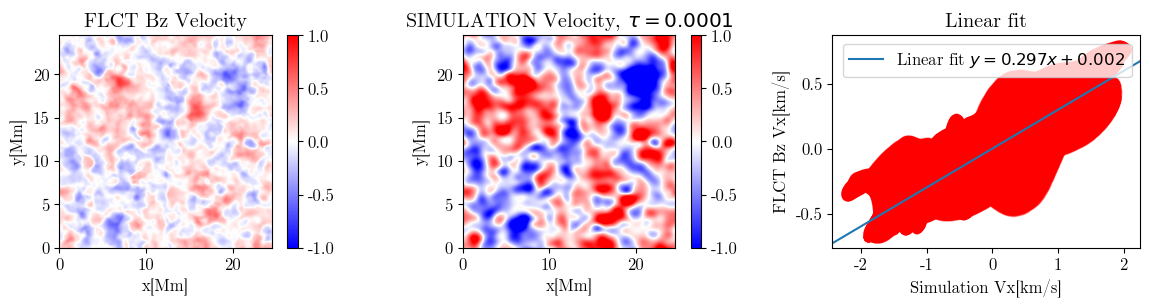

In [52]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz4_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.0001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm4_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm4_filtered600[:,:].flatten(), Vx_Bz4_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Bz Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m4, b4, *_ = linregress(Vxm4_filtered600.flatten(), Vx_Bz4_mean.flatten())
plt.axline(xy1=(0, b4), slope=m4, label=f'Linear fit $y = {m4:.3f}x {b4:+.3f}$')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM_logtaum4.png", dpi = 100)

<h2>12. 01. 2025</h2>

<h2>Tracking on Temperature vs. simulated velocities at different $\tau$-s</h2>

In [53]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

<h3>$log\tau=0$</h3>

In [54]:
Vx_Temp0_cor = mean_v_from_file("pyFLCT_fwhm_600_dt_30_logTaum0Temp_tracked.fits")
Vy_Temp0_cor = mean_vy_from_file("pyFLCT_fwhm_600_dt_30_logTaum0Temp_tracked.fits")

In [55]:
Vxm0 = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vym0 = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm0 = Vxm0.transpose(0, 2, 1)
Vym0 = Vym0.transpose(0, 2, 1)

In [56]:
Vxm0_mean = temporal_avg(Vxm0, 0, 90)
Vxm0_mean = Vxm0_mean/1E5
Vym0_mean = temporal_avg(Vym0, 0, 90)
Vym0_mean = Vym0_mean/1E5

In [57]:
Vxm0_filtered600 = gaussian_filter(Vxm0_mean, 22.5, mode = "wrap")
Vym0_filtered600 = gaussian_filter(Vym0_mean, 22.5, mode = "wrap")

In [58]:
Vx_Temp0 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum0Temp_tracked.fits")[0].data
Vy_Temp0 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum0Temp_tracked.fits")[1].data

In [59]:
Vx_Temp0_mean = temporal_avg(Vx_Temp0, 0, 90)
Vy_Temp0_mean = temporal_avg(Vy_Temp0, 0, 90)

In [60]:
Rxm0_regT = pearsonr((Vxm0[0]/1E5).flatten(), Vx_Temp0[0].flatten())
print(Rxm0_regT)

PearsonRResult(statistic=0.3744340165468067, pvalue=0.0)


In [61]:
Rym0_regT = pearsonr((Vym0[0]/1E5).flatten(), Vy_Temp0[0].flatten())
print(Rym0_regT)

PearsonRResult(statistic=0.4175382632942573, pvalue=0.0)


In [62]:
Rxm0_tavT = pearsonr(Vxm0_mean.flatten(), Vx_Temp0_mean.flatten())
print(Rxm0_tavT)

PearsonRResult(statistic=0.5958235067611463, pvalue=0.0)


In [63]:
Rym0_tavT = pearsonr(Vym0_mean.flatten(), Vy_Temp0_mean.flatten())
print(Rym0_tavT)

PearsonRResult(statistic=0.6886171795542453, pvalue=0.0)


<h3 style = "color:teal">Corrected pixel values</h3>

In [64]:
RRRRx0 = pearsonr(Vxm0_filtered600.flatten(), Vx_Temp0_cor.flatten())
print(RRRRx0)
RRRRy0 = pearsonr(Vym0_filtered600.flatten(), Vy_Temp0_cor.flatten())
print(RRRRy0)

PearsonRResult(statistic=0.6564665444316821, pvalue=0.0)
PearsonRResult(statistic=0.6649158323388733, pvalue=0.0)


<h3>Usually done values</h3>

In [65]:
Rxm0_filT = pearsonr(Vxm0_filtered600.flatten(), Vx_Temp0_mean.flatten())
print(Rxm0_filT)

PearsonRResult(statistic=0.6876213922846197, pvalue=0.0)


In [66]:
Rym0_filT = pearsonr(Vym0_filtered600.flatten(), Vy_Temp0_mean.flatten())
print(Rym0_filT)

PearsonRResult(statistic=0.7951084132319269, pvalue=0.0)


/tmp/ipykernel_19149/3858724747.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/3858724747.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Temp_vs_SIM_logtaum0.png", dpi = 100)


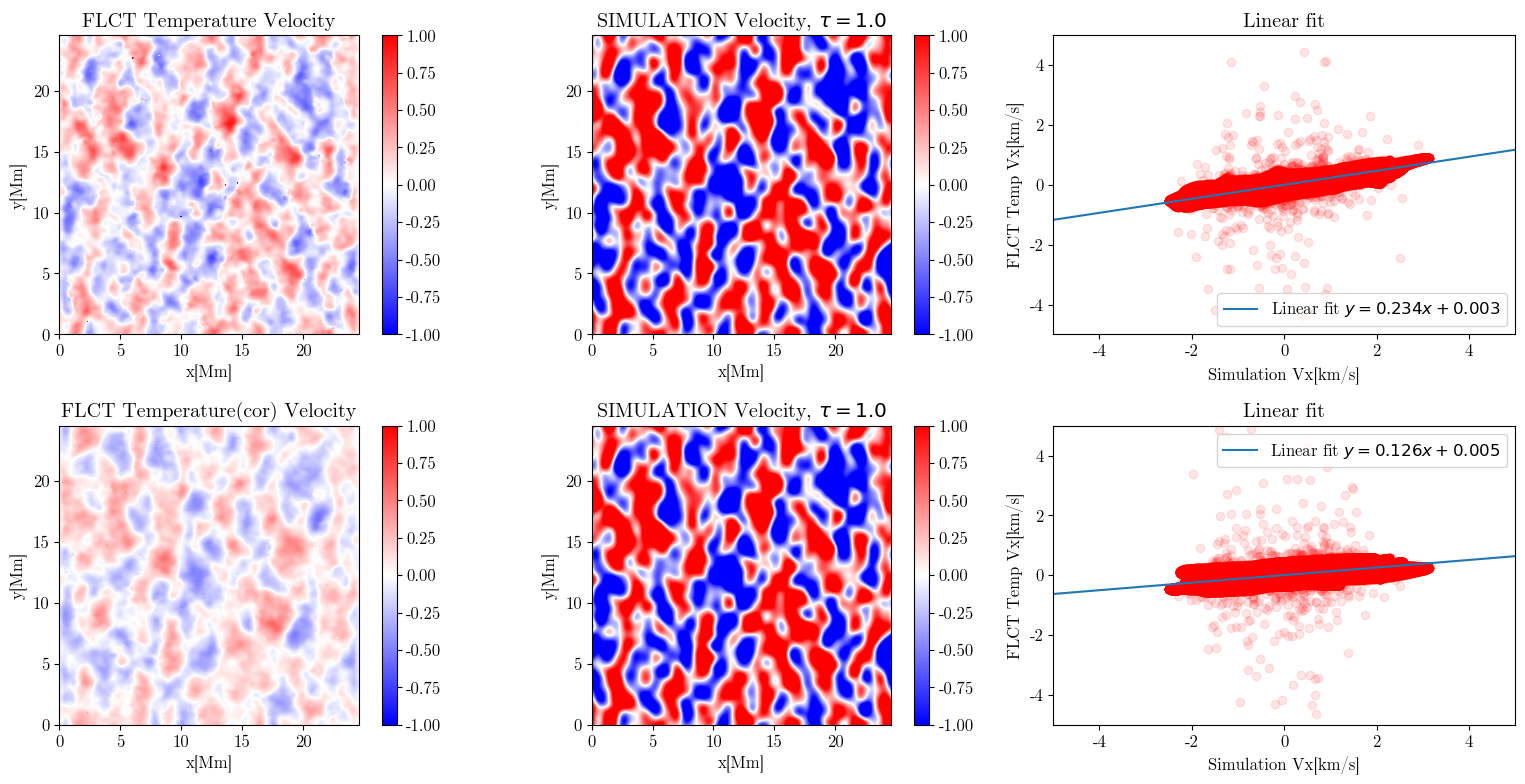

In [67]:
fig = plt.figure(figsize=[16, 8])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(231)                                      # atmos[1] temp
plt.title("FLCT Temperature Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp0_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(232)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=1.0$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm0_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(233)
plt.scatter(Vxm0_filtered600[:,:].flatten(), Vx_Temp0_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m0, b0, *_ = linregress(Vxm0_filtered600.flatten(), Vx_Temp0_mean.flatten())
plt.axline(xy1=(0, b0), slope=m0, label=f'Linear fit $y = {m0:.3f}x {b0:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(234)                                      # atmos[1] temp
plt.title("FLCT Temperature(cor) Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp0_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(235)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=1.0$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm0_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(236)
plt.scatter(Vxm0_filtered600[:,:].flatten(), Vx_Temp0_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m0c, b0c, *_ = linregress(Vxm0_filtered600.flatten(), Vx_Temp0_cor.flatten())
plt.axline(xy1=(0, b0c), slope=m0c, label=f'Linear fit $y = {m0c:.3f}x {b0c:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])


fig.tight_layout()
plt.savefig("FLCT_Temp_vs_SIM_logtaum0.png", dpi = 100)

<h3>$log\tau=-1$</h3>

In [68]:
Vx_Temp1_cor = mean_v_from_file("pyFLCT_fwhm_600_dt_30_logTaum1Temp_tracked.fits")
Vy_Temp1_cor = mean_vy_from_file("pyFLCT_fwhm_600_dt_30_logTaum1Temp_tracked.fits")

In [69]:
Vx_Temp1 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum1Temp_tracked.fits")[0].data
Vy_Temp1 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum1Temp_tracked.fits")[1].data

In [70]:
Vx_Temp1_mean = temporal_avg(Vx_Temp1, 0, 90)
Vy_Temp1_mean = temporal_avg(Vy_Temp1, 0, 90)

In [71]:
Rxm1_regT = pearsonr((Vxm1[0]/1E5).flatten(), Vx_Temp1[0].flatten())
print(Rxm1_regT)

PearsonRResult(statistic=0.12129180197497033, pvalue=0.0)


In [72]:
Rym1_regT = pearsonr((Vym1[0]/1E5).flatten(), Vy_Temp1[0].flatten())
print(Rym1_regT)

PearsonRResult(statistic=0.12750415551394956, pvalue=0.0)


In [73]:
Rxm1_tavT = pearsonr(Vxm1_mean.flatten(), Vx_Temp1_mean.flatten())
print(Rxm1_tavT)

PearsonRResult(statistic=0.46805880159282787, pvalue=0.0)


In [74]:
Rym1_tavT = pearsonr(Vym1_mean.flatten(), Vy_Temp1_mean.flatten())
print(Rym1_tavT)

PearsonRResult(statistic=0.49475136006687775, pvalue=0.0)


<h3 style="color:teal">Corrected pixel values (next two lines)</h3>

In [75]:
RRRRx1 = pearsonr(Vxm1_filtered600.flatten(), Vx_Temp1_cor.flatten())
print(RRRRx1)
RRRRy1 = pearsonr(Vym1_filtered600.flatten(), Vy_Temp1_cor.flatten())
print(RRRRy1)

PearsonRResult(statistic=0.4573611444822786, pvalue=0.0)
PearsonRResult(statistic=0.47162430810830347, pvalue=0.0)


<h3>Usually done values</h3>

In [76]:
Rxm1_filT = pearsonr(Vxm1_filtered600.flatten(), Vx_Temp1_mean.flatten())
print(Rxm1_filT)

PearsonRResult(statistic=0.5501818415037153, pvalue=0.0)


In [77]:
Rym1_filT = pearsonr(Vym1_filtered600.flatten(), Vy_Temp1_mean.flatten())
print(Rym1_filT)

PearsonRResult(statistic=0.5738187174913677, pvalue=0.0)


/tmp/ipykernel_19149/869186938.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/869186938.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Temp_vs_SIM_logtaum1.png", dpi = 100)


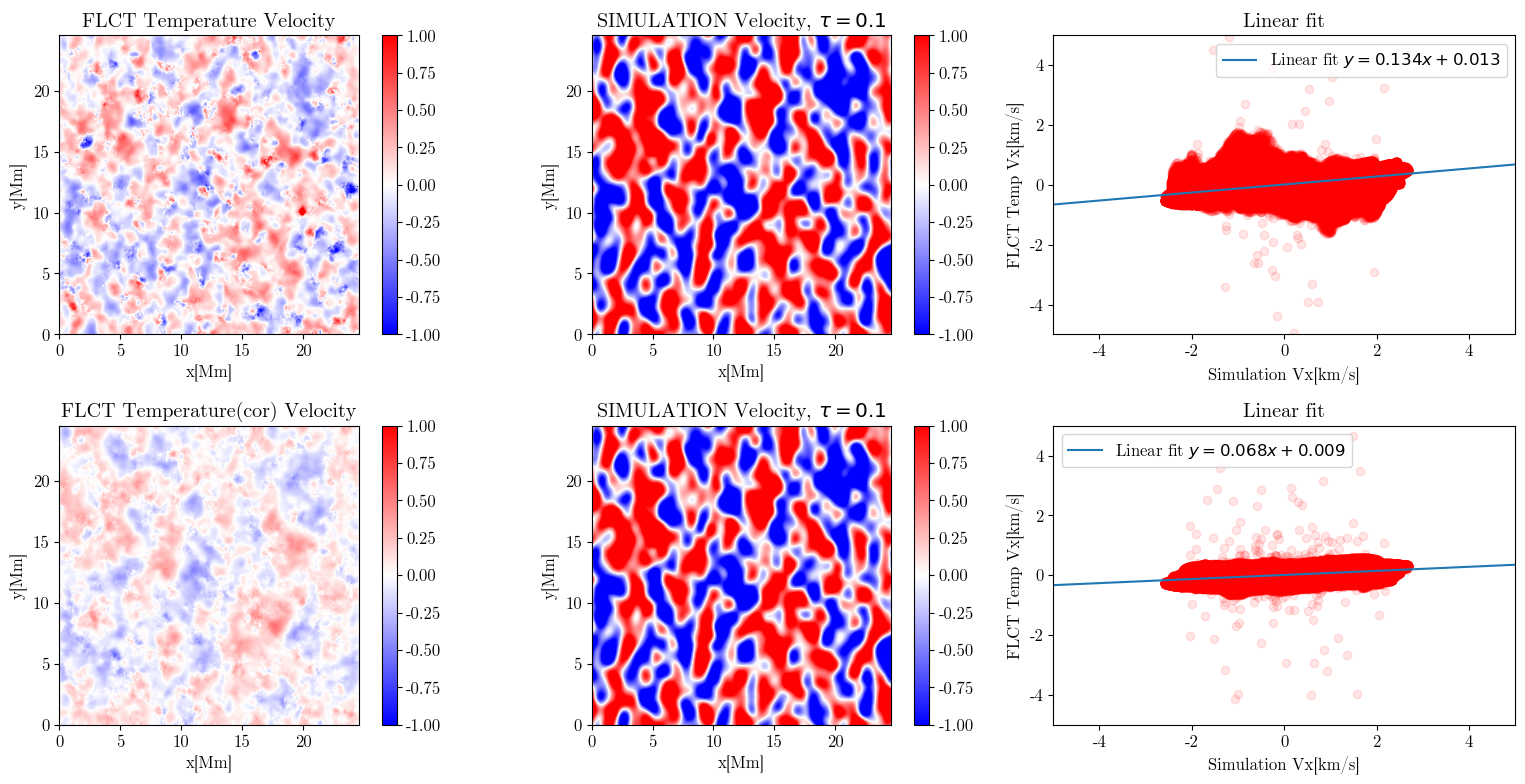

In [78]:
fig = plt.figure(figsize=[16, 8])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(231)                                      # atmos[1] temp
plt.title("FLCT Temperature Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp1_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(232)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.1$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm1_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(233)
plt.scatter(Vxm1_filtered600[:,:].flatten(), Vx_Temp1_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m, b, *_ = linregress(Vxm1_filtered600.flatten(), Vx_Temp1_mean.flatten())
plt.axline(xy1=(0, b), slope=m, label=f'Linear fit $y = {m:.3f}x {b:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(234)                                      # atmos[1] temp
plt.title("FLCT Temperature(cor) Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp1_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(235)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.1$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm1_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(236)
plt.scatter(Vxm1_filtered600[:,:].flatten(), Vx_Temp1_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
mc, bc, *_ = linregress(Vxm1_filtered600.flatten(), Vx_Temp1_cor.flatten())
plt.axline(xy1=(0, bc), slope=mc, label=f'Linear fit $y = {mc:.3f}x {bc:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])


fig.tight_layout()
plt.savefig("FLCT_Temp_vs_SIM_logtaum1.png", dpi = 100)

<h3>$\log\tau=-2$</h3>

In [79]:
Vx_Temp2 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum2Temp_tracked.fits")[0].data
Vy_Temp2 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum2Temp_tracked.fits")[1].data

In [80]:
Vx_Temp2_mean = temporal_avg(Vx_Temp2, 0, 90)
Vy_Temp2_mean = temporal_avg(Vy_Temp2, 0, 90)

In [81]:
Vx_Temp2_cor = mean_v_from_file("pyFLCT_fwhm_600_dt_30_logTaum2Temp_tracked.fits")
Vy_Temp2_cor = mean_vy_from_file("pyFLCT_fwhm_600_dt_30_logTaum2Temp_tracked.fits")

In [82]:
Rxm2_regT = pearsonr((Vxm2[0]/1E5).flatten(), Vx_Temp2[0].flatten())
print(Rxm2_regT)

PearsonRResult(statistic=0.032067653704432604, pvalue=0.0)


In [83]:
Rym2_regT = pearsonr((Vym2[0]/1E5).flatten(), Vy_Temp2[0].flatten())
print(Rym2_regT)

PearsonRResult(statistic=0.05634619180527964, pvalue=0.0)


In [84]:
Rxm2_tavT = pearsonr(Vxm2_mean.flatten(), Vx_Temp2_mean.flatten())
print(Rxm2_tavT)

PearsonRResult(statistic=0.12198848762012769, pvalue=0.0)


In [85]:
Rym2_tavT = pearsonr(Vym2_mean.flatten(), Vy_Temp2_mean.flatten())
print(Rym2_tavT)

PearsonRResult(statistic=0.15418094802668866, pvalue=0.0)


<h3 style="color:teal">Corrected pixel values</h3>

In [86]:
RRRRx2 = pearsonr(Vxm2_filtered600.flatten(), Vx_Temp2_cor.flatten())
print(RRRRx2)
RRRRy2 = pearsonr(Vym2_filtered600.flatten(), Vy_Temp2_cor.flatten())
print(RRRRy2)

PearsonRResult(statistic=0.218298238476551, pvalue=0.0)
PearsonRResult(statistic=0.22825289732828347, pvalue=0.0)


<h3>Usually done values</h3>

In [87]:
Rxm2_filT = pearsonr(Vxm2_filtered600.flatten(), Vx_Temp2_mean.flatten())
print(Rxm2_filT)

PearsonRResult(statistic=0.2024178535618424, pvalue=0.0)


In [88]:
Rym2_filT = pearsonr(Vym2_filtered600.flatten(), Vy_Temp2_mean.flatten())
print(Rym2_filT)

PearsonRResult(statistic=0.25141383268022144, pvalue=0.0)


/tmp/ipykernel_19149/2845896374.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/2845896374.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Temp_vs_SIM_logtaum2.png", dpi = 100)


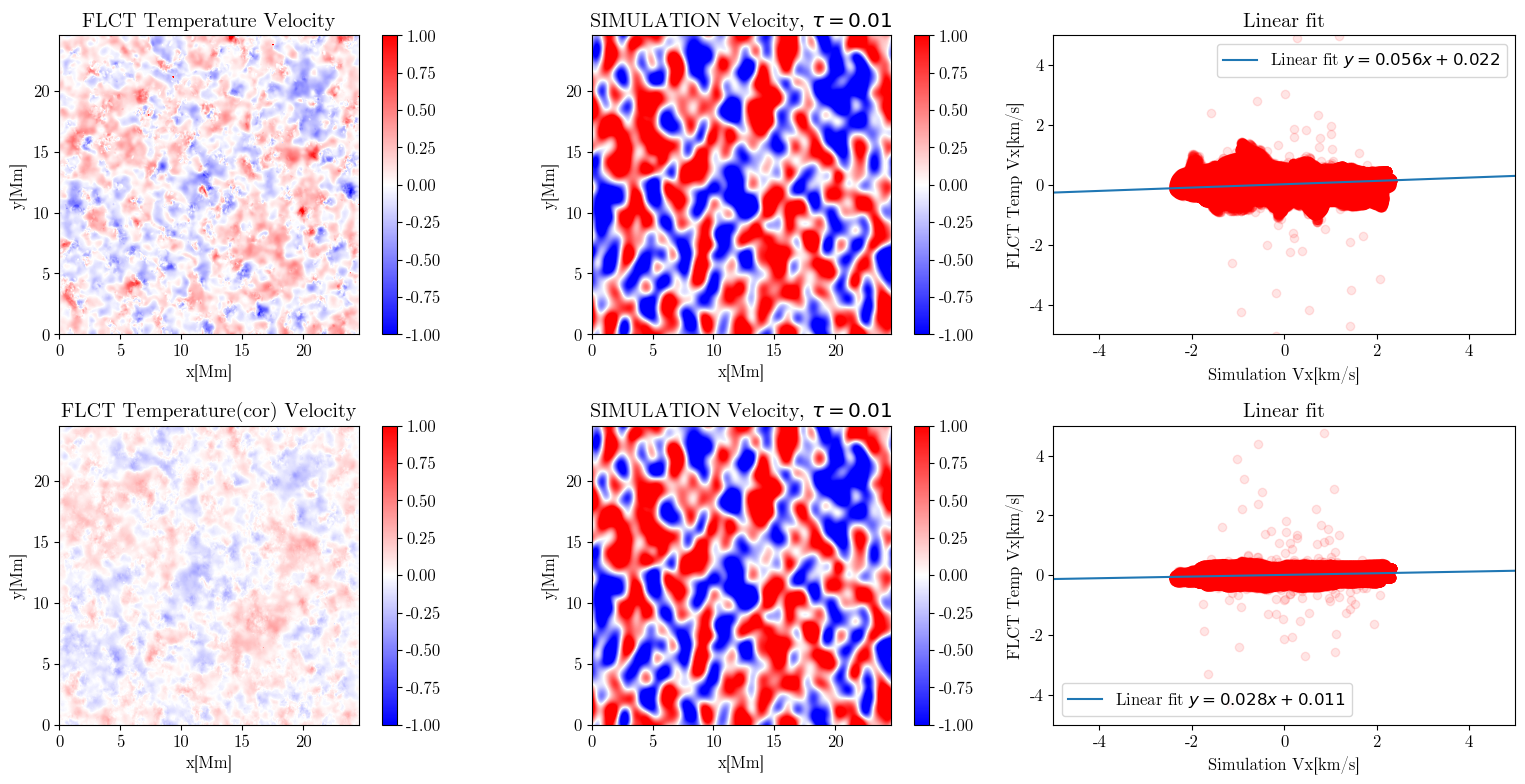

In [89]:
fig = plt.figure(figsize=[16, 8])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(231)                                      # atmos[1] temp
plt.title("FLCT Temperature Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp2_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(232)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.01$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm2_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(233)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Temp2_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m2, b2, *_ = linregress(Vxm2_filtered600.flatten(), Vx_Temp2_mean.flatten())
plt.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(234)                                      # atmos[1] temp
plt.title("FLCT Temperature(cor) Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp2_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(235)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.01$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm2_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(236)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Temp2_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m2c, b2c, *_ = linregress(Vxm2_filtered600.flatten(), Vx_Temp2_cor.flatten())
plt.axline(xy1=(0, b2c), slope=m2c, label=f'Linear fit $y = {m2c:.3f}x {b2c:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])



fig.tight_layout()
plt.savefig("FLCT_Temp_vs_SIM_logtaum2.png", dpi = 100)

<h3>$\log\tau=-3$</h3>

In [90]:
Vx_Temp3 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum3Temp_tracked.fits")[0].data
Vy_Temp3 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum3Temp_tracked.fits")[1].data

In [91]:
Vx_Temp3_mean = temporal_avg(Vx_Temp3, 0, 90)
Vy_Temp3_mean = temporal_avg(Vy_Temp3, 0, 90)

In [92]:
Vx_Temp3_cor = mean_v_from_file("pyFLCT_fwhm_600_dt_30_logTaum3Temp_tracked.fits")
Vy_Temp3_cor = mean_vy_from_file("pyFLCT_fwhm_600_dt_30_logTaum3Temp_tracked.fits")

In [93]:
Rxm3_regT = pearsonr((Vxm3[0]/1E5).flatten(), Vx_Temp3[0].flatten())
print(Rxm3_regT)

PearsonRResult(statistic=0.017812070680641286, pvalue=7.881633005697574e-165)


In [94]:
Rym3_regT = pearsonr((Vym3[0]/1E5).flatten(), Vy_Temp3[0].flatten())
print(Rym3_regT)

PearsonRResult(statistic=0.0070989096968039405, pvalue=1.1023036690249892e-27)


In [95]:
Rxm3_tavT = pearsonr(Vxm3_mean.flatten(), Vx_Temp3_mean.flatten())
print(Rxm3_tavT)

PearsonRResult(statistic=-0.04554168780575636, pvalue=0.0)


In [96]:
Rym3_tavT = pearsonr(Vym3_mean.flatten(), Vy_Temp3_mean.flatten())
print(Rym3_tavT)

PearsonRResult(statistic=-0.05987787376324717, pvalue=0.0)


<h3 style = "color:teal">Corrected pixel values</h3>

In [97]:
RRRRx3 = pearsonr(Vxm3_filtered600.flatten(), Vx_Temp3_cor.flatten())
print(RRRRx3)
RRRRy3 = pearsonr(Vym3_filtered600.flatten(), Vy_Temp3_cor.flatten())
print(RRRRy3)

PearsonRResult(statistic=-0.09273054477908767, pvalue=0.0)
PearsonRResult(statistic=-0.15127037119737247, pvalue=0.0)


<h3>Usually done values</h3>

In [98]:
Rxm3_filT = pearsonr(Vxm3_filtered600.flatten(), Vx_Temp3_mean.flatten())
print(Rxm3_filT)

PearsonRResult(statistic=-0.012745701442245117, pvalue=2.3734017796893335e-85)


In [99]:
Rym3_filT = pearsonr(Vym3_filtered600.flatten(), Vy_Temp3_mean.flatten())
print(Rym3_filT)

PearsonRResult(statistic=-0.049659169735217126, pvalue=0.0)


/tmp/ipykernel_19149/1656280113.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_19149/1656280113.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Temp_vs_SIM_logtaum3.png", dpi = 100)


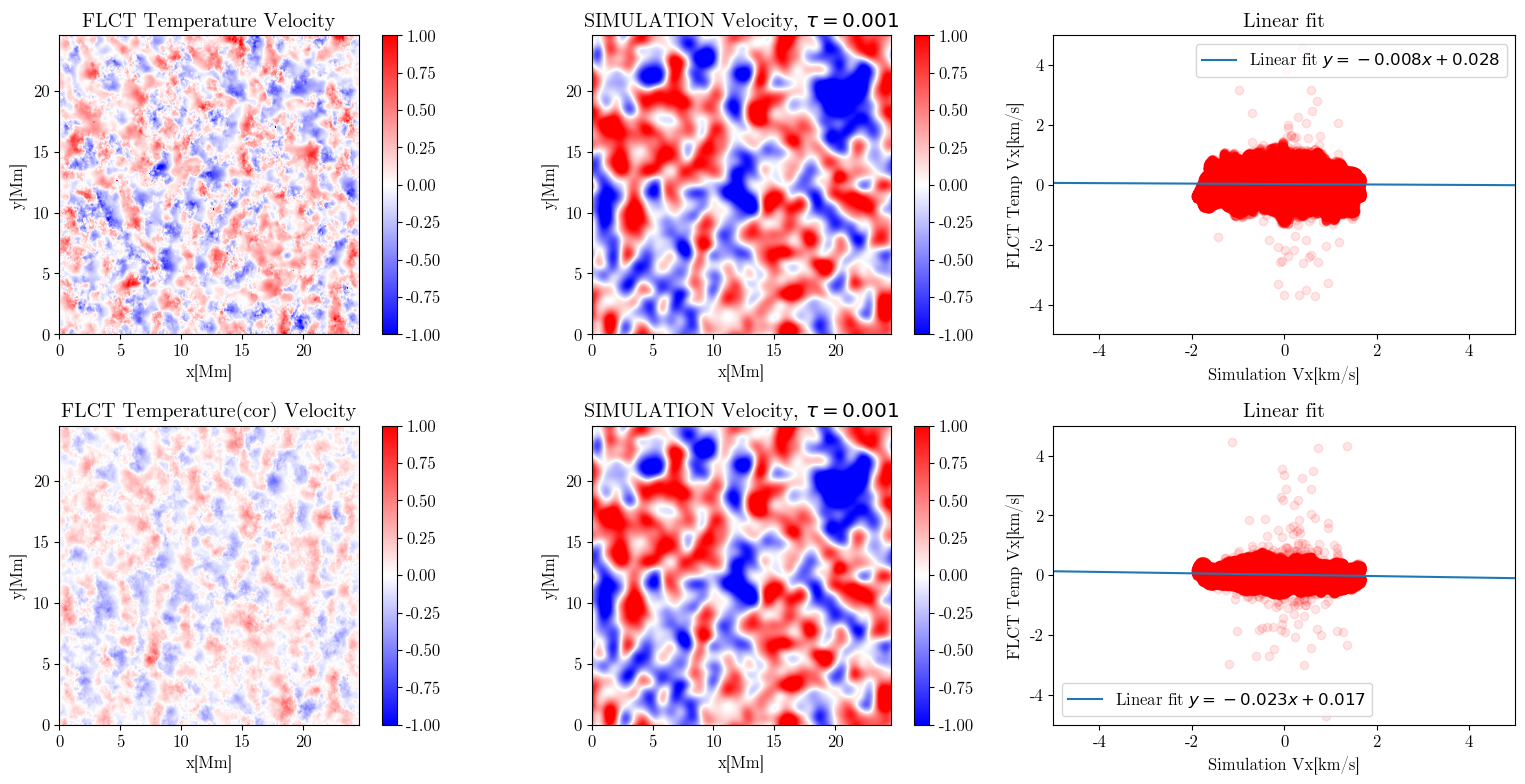

In [100]:
fig = plt.figure(figsize=[16, 8])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(231)                                      # atmos[1] temp
plt.title("FLCT Temperature Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp3_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(232)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm3_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(233)
plt.scatter(Vxm3_filtered600[:,:].flatten(), Vx_Temp3_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m3, b3, *_ = linregress(Vxm3_filtered600.flatten(), Vx_Temp3_mean.flatten())
plt.axline(xy1=(0, b3), slope=m3, label=f'Linear fit $y = {m3:.3f}x {b3:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(234)                                      # atmos[1] temp
plt.title("FLCT Temperature(cor) Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Temp3_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(235)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm3_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(236)
plt.scatter(Vxm3_filtered600[:,:].flatten(), Vx_Temp3_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m3c, b3c, *_ = linregress(Vxm3_filtered600.flatten(), Vx_Temp3_cor.flatten())
plt.axline(xy1=(0, b3c), slope=m3c, label=f'Linear fit $y = {m3c:.3f}x {b3c:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])



fig.tight_layout()
plt.savefig("FLCT_Temp_vs_SIM_logtaum3.png", dpi = 100)